In [35]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt


def readfile(filename):
	"""
		Reads data from a csv file to create a pandas dataframe

		:param filename: name of file to be imported

		:return: pandas dataframe containing the data of the given file.
	"""
	data = pd.read_csv(filename, delimiter=',', low_memory=False)
	return data


data = readfile("food_dat.csv")
data = data.drop("Location", axis = 1)
data = data.drop("State", axis = 1)
data = data.drop("City", axis = 1)

	

In [42]:
print(data.shape)
print(data[data["Inspection Type"] == "Complaint"].shape[0])






(181623, 14)
16858


0                          Canvass Re-Inspection
1                                      Complaint
2         Suspected Food Poisoning Re-inspection
3                                        License
4                          Canvass Re-Inspection
5                                        License
6                          License Re-Inspection
7                                        License
8                          License Re-Inspection
9                                        Canvass
10                                       License
11                                       License
12                       Complaint Re-Inspection
13                                     Complaint
14                                       License
15                                       License
16                                       License
17                                       License
18                                       License
19                       Complaint Re-Inspection
20                  

In [57]:
d = data[data["Inspection Type"] == "Complaint"].groupby("Facility Type").count().sort_values(["DBA Name"], ascending=False)

# get top ten most complaint prone eating places.
top_comp = d.index.get_level_values("Facility Type")[0:10]
top_comp

Index(['Restaurant', 'Grocery Store', 'Bakery', 'School', 'Liquor',
       'Wholesale', 'Catering', 'TAVERN', 'Long Term Care', 'Hospital'],
      dtype='object', name='Facility Type')

In [71]:
y = []
for eat_type in top_comp:
    print(eat_type)
    app = data[(data["Inspection Type"] == "Complaint") & (data["Facility Type"] == eat_type) & (data["Results"] == "Fail")].count() / \
    data[(data["Inspection Type"] == "Complaint") & (data["Facility Type"] == eat_type)].count()
    y.append(app["Address"])

#data["Inspection Type"]

Restaurant
Grocery Store
Bakery
School
Liquor
Wholesale
Catering
TAVERN
Long Term Care
Hospital


[0.30633532750421844,
 0.38027162258756253,
 0.37790697674418605,
 0.35185185185185186,
 0.4117647058823529,
 0.4861111111111111,
 0.375,
 0.44642857142857145,
 0.42105263157894735,
 0.04]

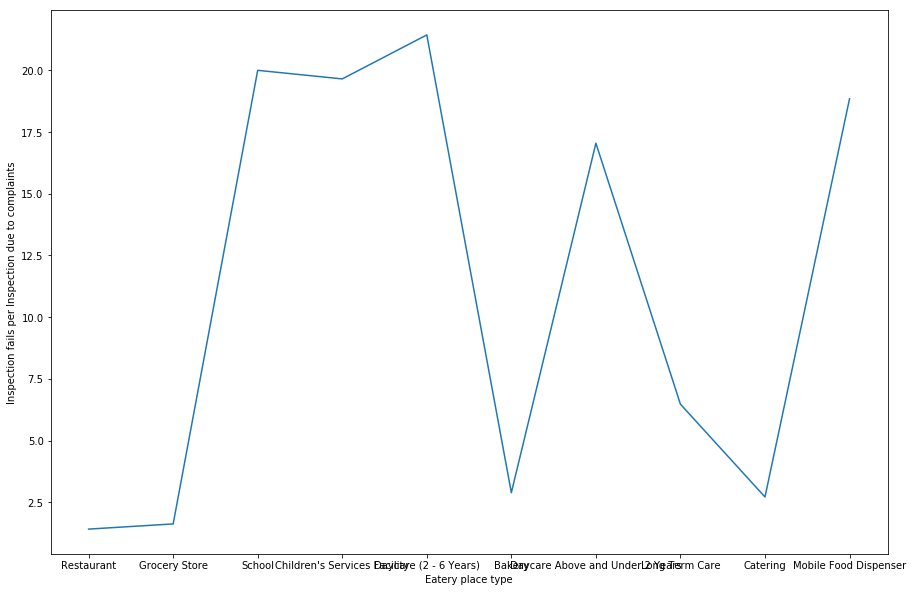

In [86]:
plt.figure(figsize=(15,10))
plt.xticks(range(1,11), top_comp)
plt.ylabel("Inspection fails per Inspection due to complaints")
plt.xlabel("Eatery place type")
plt.plot(range(1,11), y)
plt.savefig("complain_plot.png")

In [87]:
d = data[data["Inspection Type"] != "Complaint"].groupby("Facility Type").count().sort_values(["DBA Name"], ascending=False)

# get top ten most complaint prone eating places.
top_comp = d.index.get_level_values("Facility Type")[0:10]
top_comp

Index(['Restaurant', 'Grocery Store', 'School', 'Children's Services Facility',
       'Daycare (2 - 6 Years)', 'Bakery', 'Daycare Above and Under 2 Years',
       'Long Term Care', 'Catering', 'Mobile Food Dispenser'],
      dtype='object', name='Facility Type')

In [88]:
y = []
for eat_type in top_comp:
    print(eat_type)
    app = data[(data["Inspection Type"] != "Complaint") & (data["Facility Type"] == eat_type) & (data["Results"] == "Fail")].count() / \
    data[(data["Inspection Type"] == "Complaint") & (data["Facility Type"] == eat_type)].count()
    y.append(app["Address"])

Restaurant
Grocery Store
School
Children's Services Facility
Daycare (2 - 6 Years)
Bakery
Daycare Above and Under 2 Years
Long Term Care
Catering
Mobile Food Dispenser


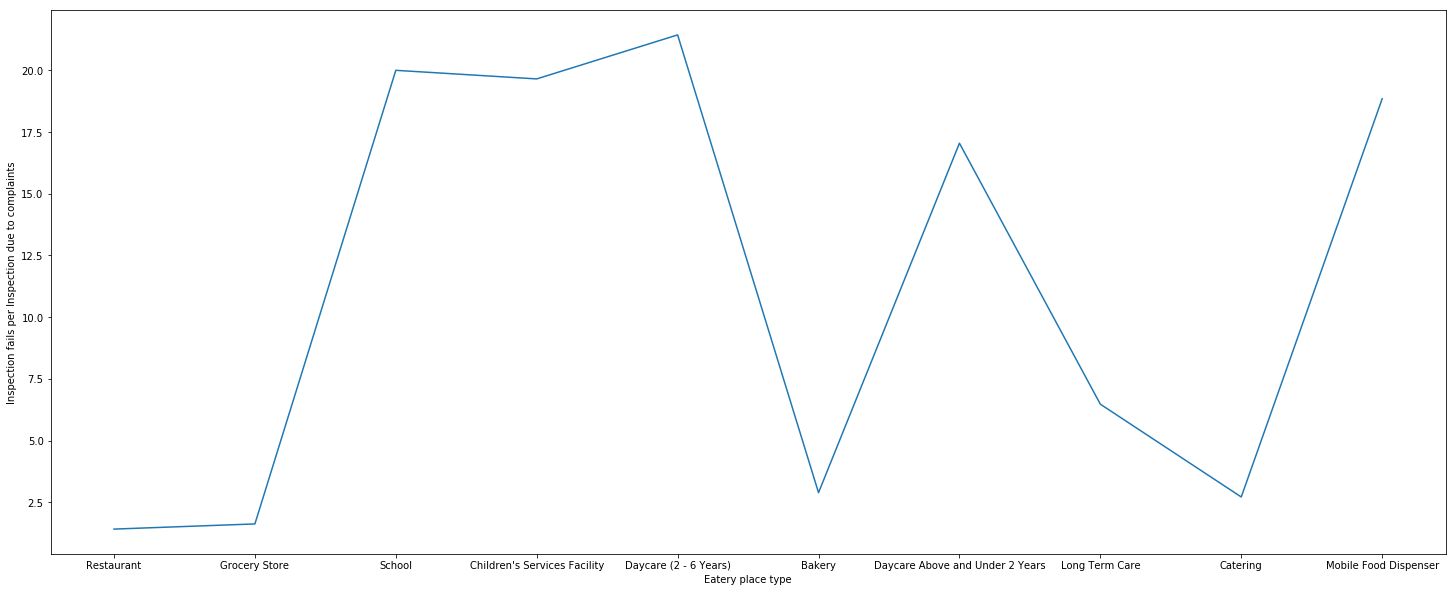

In [89]:
plt.figure(figsize=(25,10))
plt.xticks(range(1,11), top_comp)
plt.ylabel("Inspection fails per Inspection due to complaints")
plt.xlabel("Eatery place type")
plt.plot(range(1,11), y)
plt.savefig("non_complaint.png")